<a href="https://colab.research.google.com/github/tugsaporn-li/project/blob/main/Amazon%20Sales%20Analysis/Amazon_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset:** https://www.kaggle.com/datasets/karkavelrajaj/amazon-sales-dataset/data

This dataset is having the data of 1K+ Amazon Product's Ratings and Reviews as per their details listed on the official website of Amazon.

- product_id - Product ID
- product_name - Name of the Product
- category - Category of the Product
- discounted_price - Discounted Price of the Product
- actual_price - Actual Price of the Product
- discount_percentage - Percentage of Discount for the Product
- rating - Rating of the Product
- rating_count - Number of people who voted for the Amazon rating
- about_product - Description about the Product
- user_id - ID of the user who wrote review for the Product
- user_name - Name of the user who wrote review for the Product
- review_id - ID of the user review
- review_title - Short review
- review_content - Long review
- img_link - Image Link of the Product
- product_link - Official Website Link of the Product

**Project Objective:** To analyze the relationship between **pricing strategies**, **discount effectiveness**, and **customer satisfaction** across various product categories on Amazon. The goal is to develop a data-driven strategy for product portfolio optimization and quality control.

**Task:** Exploring the Amazon Sales Dataset involves a step-by-step process.
1. **Data Preparation**: Clean the raw data by handling missing values and formatting data types.

2. **Exploratory Data Analysis (EDA)**: Perform initial exploration to understand distribution, identify outliers, and detect patterns in product categories.

3. **Strategic Business Insight Analysis:** Conduct in-depth analysis to uncover relationships between pricing, discount levels, and customer ratings. This stage focuses on identifying the key drivers of sales performance and customer satisfaction.

4. **Strategy Matrix:** Classify products into four distinct segments based on two key metrics: Customer Satisfaction (Rating) and Market Popularity (Rating Count).

# 1. Data Preparation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# load data
df = pd.read_csv("https://raw.githubusercontent.com/tugsaporn-li/project/refs/heads/main/Amazon%20Sales%20Analysis/amazon.csv")

In [3]:
# how many rows and columns
df.shape

(1465, 16)

In [4]:
# column names and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [5]:
# top 5 rows of the data
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


## Missing Value

In [6]:
# missing values
df.isnull().sum().sort_values(ascending=False)

,0
rating_count,2
product_id,0
category,0
product_name,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
about_product,0
user_id,0


In [7]:
df.nunique()

,0
product_id,1351
product_name,1337
category,211
discounted_price,550
actual_price,449
discount_percentage,92
rating,28
rating_count,1143
about_product,1293
user_id,1194


1. There are 1465 rows and 16 columns in the dataset.
2. The data type of all columns is object.
3. There are a 2 missing values in the rating_count column, which we will read in detail and deal with later.

In [8]:
# discounted price and actual price column
# remove currency and comma symbols (e.g., ₹)
# convert data type from object to float

df['discounted_price'] = df['discounted_price'].str.replace('₹', '', regex=False).str.replace(',', '', regex=False).astype(float)
df['actual_price'] = df['actual_price'].str.replace('₹', '', regex=False).str.replace(',', '', regex=False).astype(float)

In [9]:
# discount_percentage column
# remove % symbol and convert into percentage
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '', regex=False).astype(float)
df['discount_percentage'] = df['discount_percentage']/100

In [10]:
# rating column
df['rating'].unique()

array(['4.2', '4.0', '3.9', '4.1', '4.3', '4.4', '4.5', '3.7', '3.3',
       '3.6', '3.4', '3.8', '3.5', '4.6', '3.2', '5.0', '4.7', '3.0',
       '2.8', '4', '3.1', '4.8', '2.3', '|', '2', '3', '2.6', '2.9'],
      dtype=object)

In [11]:
# check the strange row
df.query('rating == "|"')

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",2099.0,2499.0,0.16,|,992,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...


In [12]:
# I looked it up on Amazon and found that this product has a 4.0 rating.
df['rating'] = df['rating'].str.replace('|', '4.0', regex=False).astype(float)

In [13]:
# rating_count
df['rating_count'] = df['rating_count'].str.replace(',', '', regex=False).astype(float)

In [15]:
df[df['rating_count'].isna()]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
282,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories|Accessories&Peripherals|...,199.0,999.0,0.80,3.0,NaN,USB C to C Cable: This cable has type C connec...,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,249.0,999.0,0.75,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...


In [14]:
# impute missing values with zero
df['rating_count'] = df['rating_count'].fillna(0)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   float64
 7   rating_count         1465 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

## Duplicate

In [16]:
# check duplicate
df.duplicated().sum()

np.int64(0)

# 2. Exploratory Data Analysis (EDA)

In [17]:
# descriptie statistics
df.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000
mean,3125.310874,5444.990635,0.476915,4.096519,18270.564505
std,6944.304394,10874.826864,0.216359,0.291585,42729.995315
min,39.000000,39.000000,0.000000,2.000000,0.000000
25%,325.000000,800.000000,0.320000,4.000000,1173.000000
50%,799.000000,1650.000000,0.500000,4.100000,5178.000000
75%,1999.000000,4295.000000,0.630000,4.300000,17325.000000
max,77990.000000,139900.000000,0.940000,5.000000,426973.000000


1. The count for all columns is consistently 1,465, confirming that the dataset is now clean of missing values and duplicates.

2. The maximum actual_price is 139,900, which is about 30 times higher than the 75th percentile (4,295). These represent luxury or high-end segments within the dataset.

3. The average discount is approximately 47%, with some products discounted by as much as 94%.

4. **Price Distribution:** The average of actual_price is higher than median. This is a right-skewed distribution, where a majority of products are affordably priced, but a few high-ticket items pull the average upward.

5. **Rating Distribution:** The average and median of rating are almost identical, which means the most products are consistently well-rated around the 4-star.

In [18]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,0.64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,0.43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,0.90,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,0.53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,0.61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


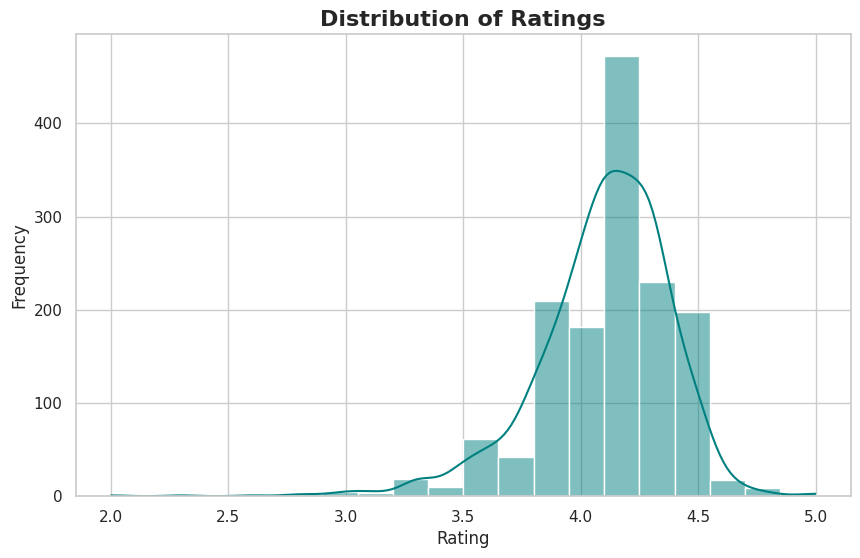

In [19]:
sns.set_theme(style="whitegrid")

# distribution of rating
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=20, kde=True, color='teal')

plt.title('Distribution of Ratings', fontsize=16, fontweight='bold')
plt.xlabel('Rating')
plt.ylabel('Frequency')

plt.show()

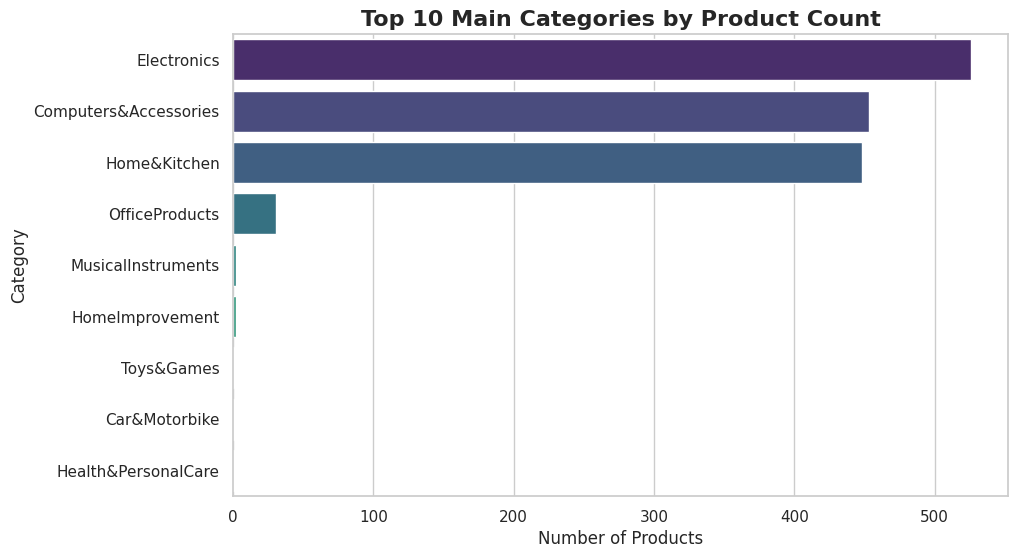

In [20]:
# top 10 main categories

# extract the first part of the category string
df['main_category'] = df['category'].str.split('|').str[0]
top_categories = df['main_category'].value_counts().head(10)

# plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_categories.values,
    y=top_categories.index,
    hue=top_categories.index,
    palette='viridis',
    legend=False
)

plt.title('Top 10 Main Categories by Product Count', fontsize=16, fontweight='bold')
plt.xlabel('Number of Products')
plt.ylabel('Category')

plt.show()

This chart clearly shows that **Electronics**, **Home & Kitchen**, and **Computers & Accessories** are the dominant segments in this dataset.

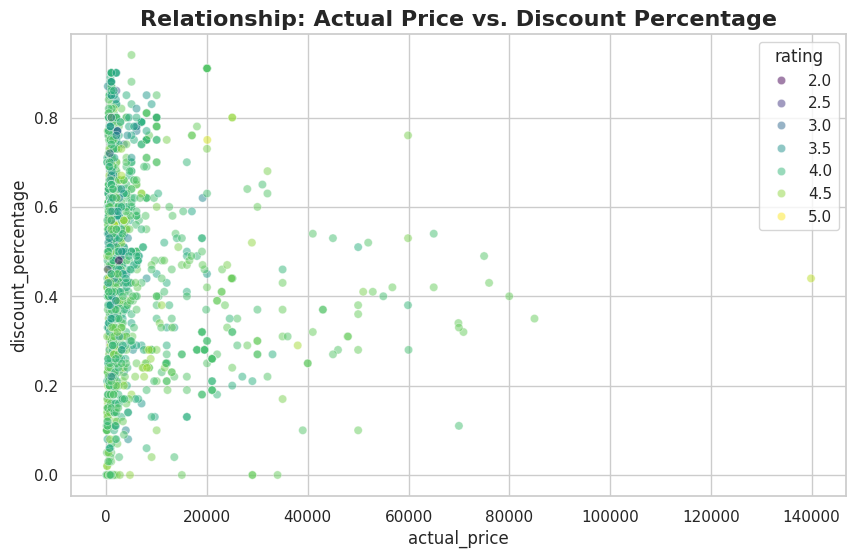

In [21]:
# actual price vs. discounted price (scatter plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='actual_price', y='discount_percentage', alpha=0.5, hue='rating', palette='viridis')
plt.title('Relationship: Actual Price vs. Discount Percentage', fontsize=16, fontweight='bold')
plt.show()

The scatter plot shows many products under 20,000 with huge discounts. High-priced items are rare and have steady discounts. Product ratings are high everywhere, which means a higher price doesn't always mean a better rating.

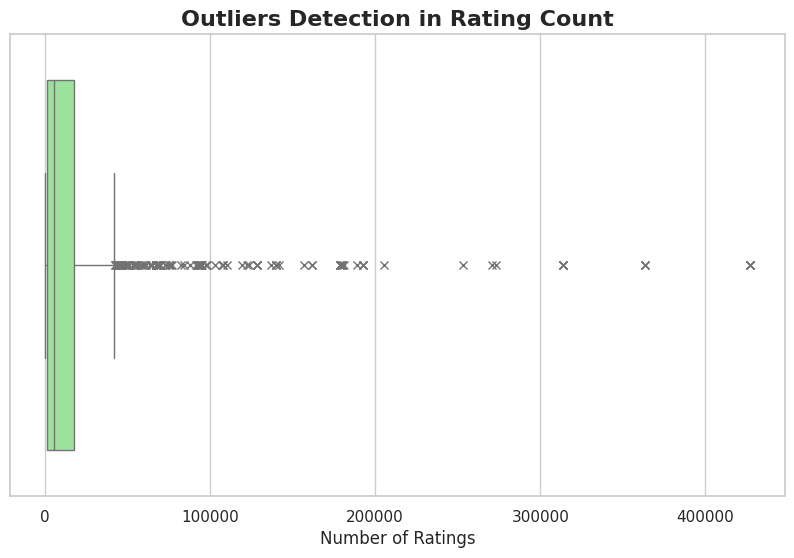

In [22]:
# rating count outliers (box plot)
plt.figure(figsize=(10, 6))

sns.boxplot(x=df['rating_count'], color='lightgreen', flierprops={"marker": "x"})

plt.title('Outliers Detection in Rating Count', fontsize=16, fontweight='bold')
plt.xlabel('Number of Ratings')

plt.show()


The box plot shows that most products have a relatively small number of ratings (under 20,000). However, we see many 'outliers' extending far to the right. These are the best-selling items that have hundreds of thousands of reviews, making them stand out significantly from the average product.

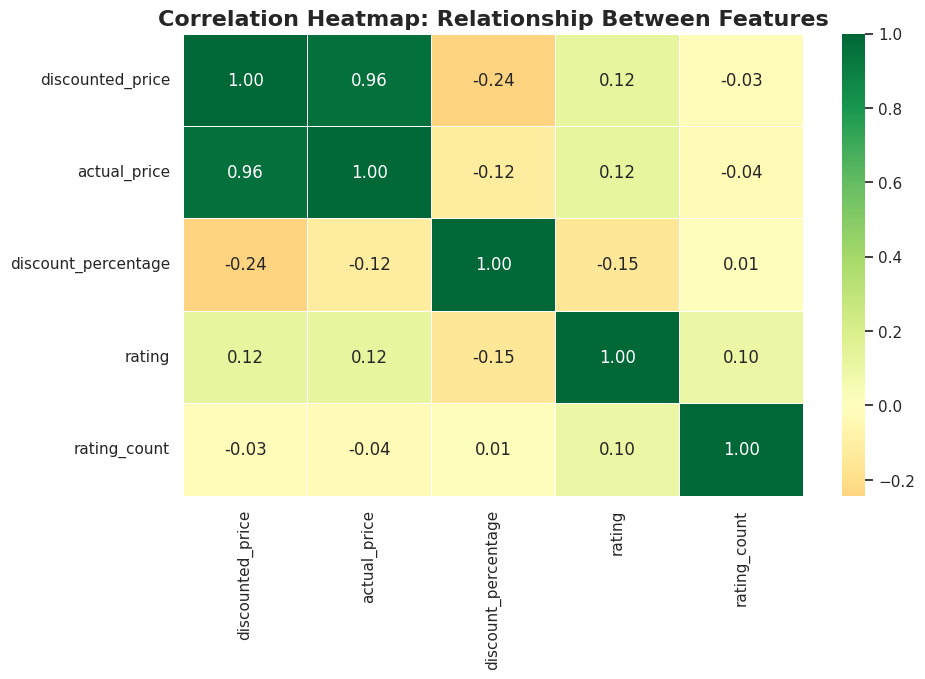

In [23]:
# correlation heatmap
plt.figure(figsize=(10, 6))

# select only numeric columns for correlation
numeric_cols = df[['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']]
correlation_matrix = numeric_cols.corr()

# plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', fmt='.2f', center=0, linewidths=0.5)
plt.title('Correlation Heatmap: Relationship Between Features', fontsize=16, fontweight='bold')
plt.show()


1. Product price has almost no relationship with ratings. This suggests customers rate products based on quality and expectations rather than the price tag.

2. High discounts don't guarantee high ratings. While big sales attract buyers, product quality remains the key driver of customer satisfaction.

# 3. Strategic Business Insight Analysis

This section answers basic business questions to understand the current situation before we deep dive into specific problems.

### Q1: What is the average rating for each product category?

In [24]:
df['sub_category'] = df['category'].str.split('|').str[-1]
df.groupby(['main_category', 'category', 'sub_category'])['rating'].mean().reset_index().sort_values(by='rating', ascending=False)

,main_category,category,sub_category,rating
57,Computers&Accessories,Computers&Accessories|Tablets,Tablets,4.6
48,Computers&Accessories,Computers&Accessories|NetworkingDevices|Networ...,PowerLANAdapters,4.5
62,Electronics,Electronics|Cameras&Photography|Accessories|Film,Film,4.5
38,Computers&Accessories,Computers&Accessories|Components|Memory,Memory,4.5
81,Electronics,Electronics|HomeAudio|MediaStreamingDevices|St...,StreamingClients,4.5
...,...,...,...,...
3,Computers&Accessories,Computers&Accessories|Accessories&Peripherals|...,PCMicrophones,3.6
88,Electronics,"Electronics|HomeTheater,TV&Video|Accessories|3...",3DGlasses,3.5
2,Computers&Accessories,Computers&Accessories|Accessories&Peripherals|...,PCHeadsets,3.5
14,Computers&Accessories,Computers&Accessories|Accessories&Peripherals|...,DustCovers,3.4


### Q2: What are the top rating_count products by category?

In [25]:
# top rating count of each main category
top_products = df.sort_values('rating_count', ascending=False).groupby('main_category').head(1)

top_products[['main_category', 'sub_category','product_name', 'rating_count', 'rating']]

,main_category,sub_category,product_name,rating_count,rating
12,Electronics,HDMICables,AmazonBasics Flexible Premium HDMI Cable (Blac...,426973.0,4.4
1028,Home&Kitchen,Choppers,Pigeon Polypropylene Mini Handy and Compact Ch...,270563.0,4.1
588,Computers&Accessories,PenDrives,SanDisk Cruzer Blade 32GB USB Flash Drive,253105.0,4.3
613,MusicalInstruments,Condenser,Boya ByM1 Auxiliary Omnidirectional Lavalier C...,68664.0,4.0
924,Toys&Games,ColouringPens&Markers,Faber-Castell Connector Pen Set - Pack of 25 (...,15867.0,4.3
659,OfficeProducts,Scientific,Casio FX-82MS 2nd Gen Non-Programmable Scienti...,12179.0,4.4
982,HomeImprovement,CordManagement,"Gizga Essentials Cable Organiser, Cord Managem...",5985.0,4.5
1247,Health&PersonalCare,DigitalBathroomScales,Dr Trust Electronic Kitchen Digital Scale Weig...,3663.0,4.0
1157,Car&Motorbike,AirPurifiers&Ionizers,Reffair AX30 [MAX] Portable Air Purifier for C...,1118.0,3.8


### Q3: What is the distribution of discounted prices vs. actual prices?

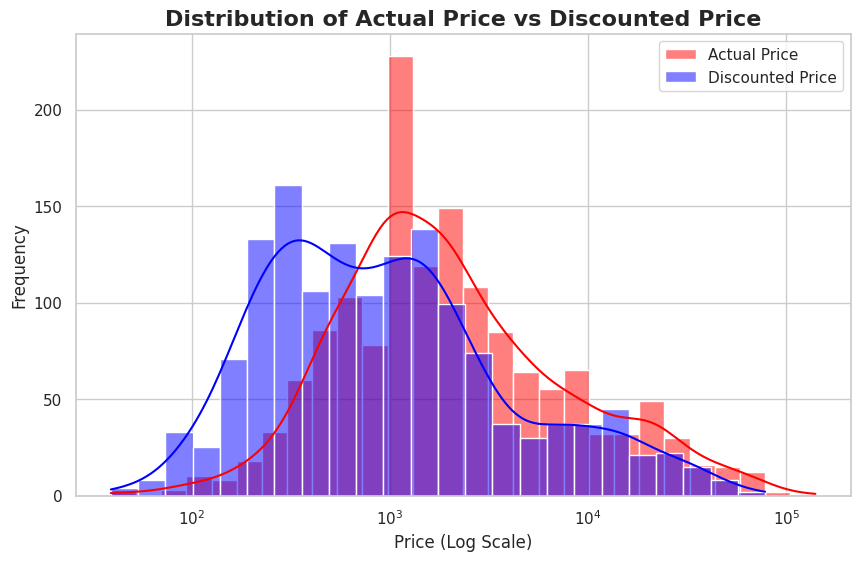

In [26]:
plt.figure(figsize=(10, 6))

sns.histplot(df['actual_price'], color="red", label="Actual Price", kde=True, log_scale=True)
sns.histplot(df['discounted_price'], color="blue", label="Discounted Price", kde=True, log_scale=True)

plt.title('Distribution of Actual Price vs Discounted Price', fontsize=16, fontweight='bold')
plt.xlabel('Price (Log Scale)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

The chart shows a clear 'Left-Shift' in prices. This proves that high discounts are a standard strategy on the platform.

### Q4: How does the average discount percentage vary across categories?

In [27]:
avg_discount_df = df.groupby('main_category')['discount_percentage'].mean().mul(100).round(2).sort_values(ascending=False).reset_index()
avg_discount_df.columns = ['Main Category', 'Average Discount (%)']

avg_discount_df

,Main Category,Average Discount (%)
0,HomeImprovement,57.50
1,Computers&Accessories,54.02
2,Health&PersonalCare,53.00
3,Electronics,50.83
4,MusicalInstruments,46.00
5,Car&Motorbike,42.00
6,Home&Kitchen,40.12
7,OfficeProducts,12.35
8,Toys&Games,0.00


The data reveals two different strategies: Electronics and Home items rely on massive discounts to drive sales, while Office and Toy products maintain their brand value with stable pricing.

### Q5: What are the most popular product name?

In [28]:
# count product name ad sort by occurences
top_products_with_cat = df.groupby(['product_name', 'main_category', 'sub_category']).size().reset_index(name='occurrences')
top_10_products = top_products_with_cat.sort_values(by='occurrences', ascending=False).head(10)

with pd.option_context('display.max_colwidth', None):
  print("Top 10 Most Popular Product Name:")
  display(top_10_products)

Top 10 Most Popular Product Name:


,product_name,main_category,sub_category,occurrences
384,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution",Electronics,SmartWatches,5
386,"Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3"",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating",Electronics,SmartWatches,4
975,"Samsung Galaxy M13 5G (Aqua Green, 6GB, 128GB Storage) | 5000mAh Battery | Upto 12GB RAM with RAM Plus",Electronics,Smartphones,3
1023,"Sounce Fast Phone Charging Cable & Data Sync USB Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini & iOS Devices",Computers&Accessories,USBCables,3
1247,"boAt A400 USB Type-C to USB-A 2.0 Male Data Cable, 2 Meter (Black)",Computers&Accessories,USBCables,3
1271,"boAt Micro USB 55 Tangle-free, Sturdy Micro USB Cable with 3A Fast Charging & 480mbps Data Transmission (Black)",Computers&Accessories,USBCables,3
121,"Ambrane 2 in 1 Type-C & Micro USB Cable with 60W / 3A Fast Charging, 480 mbps High Data, PD Technology & Quick Charge 3.0, Compatible with All Type-C & Micro USB Devices (ABDC-10, Black)",Computers&Accessories,USBCables,3
125,"Ambrane 60W / 3A Fast Charging Output Cable with Type-C to USB for Mobile, Neckband, True Wireless Earphone Charging, 480mbps Data Sync Speed, 1m Length (ACT - AZ10, Black)",Computers&Accessories,USBCables,3
394,Flix Micro Usb Cable For Smartphone (Black),Computers&Accessories,USBCables,3
380,"Fire-Boltt India's No 1 Smartwatch Brand Talk 2 Bluetooth Calling Smartwatch with Dual Button, Hands On Voice Assistance, 60 Sports Modes, in Built Mic & Speaker with IP68 Rating",Electronics,SmartWatches,3


How these identical-looking items are different?

In [29]:
target_name = 'Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution'

diff_check = df[df['product_name'] == target_name][['product_id', 'discounted_price', 'actual_price', 'rating', 'rating_count', 'img_link']]
diff_check

,product_id,discounted_price,actual_price,rating,rating_count,img_link
334,B0BF57RN3K,1799.0,19999.0,4.2,13937.0,https://m.media-amazon.com/images/I/41WCgGbvwh...
364,B0BF54972T,1799.0,19999.0,4.2,13937.0,https://m.media-amazon.com/images/I/41mzbWC6Ak...
368,B0BF563HB4,1799.0,19999.0,4.2,13937.0,https://m.media-amazon.com/images/I/41ivjqdXb0...
372,B0BF4YBLPX,1799.0,19999.0,4.2,13937.0,https://m.media-amazon.com/images/I/410VGCE+q2...
380,B0BF54LXW6,1799.0,19999.0,4.2,13937.0,https://m.media-amazon.com/images/I/41Fq27ZjJf...


Even though the names are identical, these 5 items are likely different colors or bundles. By checking the product_id and img_link, we can see that they represent separate listings for the same model.

### Q6: What are the most popular product keywords?

In [30]:
from collections import Counter
import re

all_names = " ".join(df['product_name'].astype(str)).lower()

words = re.findall(r'\w+', all_names)
stop_words = {'with', 'for', 'and', 'the', 'a', 'in', 'to', 'of', 'on', 'at', 'by', 'is', 'this', 'that', 'from'}
filtered_words = [word for word in words if word not in stop_words and len(word) > 2 and not word.isdigit()]

top_keywords = pd.DataFrame(Counter(filtered_words).most_common(10), columns=['Keyword', 'Count'])
top_keywords

,Keyword,Count
0,black,530
1,usb,417
2,cable,414
3,charging,247
4,type,243
5,fast,212
6,smart,175
7,white,170
8,compatible,146
9,data,136


Based on the keyword table, the platform is heavily populated by 'Cables' and 'USB' accessories. The most popular selling features are 'Fast' and 'Charging'.

### Q7: What is the correlation between discounted_price and rating?

In [38]:
correlation_coefficient = df["discounted_price"].corr(df["rating"])
print(f"Correlation between discounted_price and rating is {correlation_coefficient:.2f}")

Correlation between discounted_price and rating is 0.12


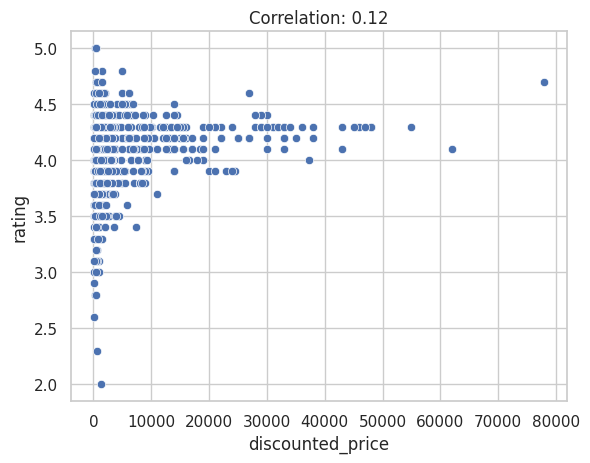

In [40]:
sns.scatterplot(data=df, x='discounted_price', y='rating')
plt.title(f'Correlation: {correlation_coefficient:.2f}')
plt.show()

Discounted price and rating have a weak positive correlation. This indicates that high discounts don't guarantee high ratings.

From these basic insights, we see that price and discounts aren't the only things that matter. To get a clearer picture of which products are winning and which are failing, I created a 'Strategy Matrix' to group them into four specific segments.

# 4. Strategic Matrix

We will classify products into four distinct segments based on two key metrics: Customer Satisfaction (Rating) and Market Popularity (Rating Count).

1. **The Stars (High Rating, High Popularity):** high customer satisfaction and a high number of reviews

2. **The Hidden Gems (High Rating, Low Popularity):** high-potential products that need more visibility, we need to improve SEO for these items to turn them into the stars

3. **The Mass (Low Rating, High Popularity):** sell in large volumes but have average or below-average ratings

4. **The Underperformers (Low Rating, Low Popularity):** neither popular nor well-liked

In [51]:
# filter product that has rating count more than 10 to ensure credibility
df_final = df[df['rating_count'] >= 10].copy()

# thresholds to classify each segment
rating_thresholds = df_final['rating'].median()
count_thresholds = df_final['rating_count'].median()

def segment_products(row):
    if row['rating'] >= rating_thresholds and row['rating_count'] >= count_thresholds:
        return 'The Stars'
    elif row['rating'] >= rating_thresholds and row['rating_count'] < count_thresholds:
        return 'The Hidden Gems'
    elif row['rating'] < rating_thresholds and row['rating_count'] >= count_thresholds:
        return 'The Mass'
    else:
        return 'Underperformers'

# create new column
df_final['product_segment'] = df_final.apply(segment_products, axis=1)

# count number of product in each segment
df_final['product_segment'].value_counts()

,count
product_segment,
The Stars,512
The Hidden Gems,412
Underperformers,314
The Mass,214


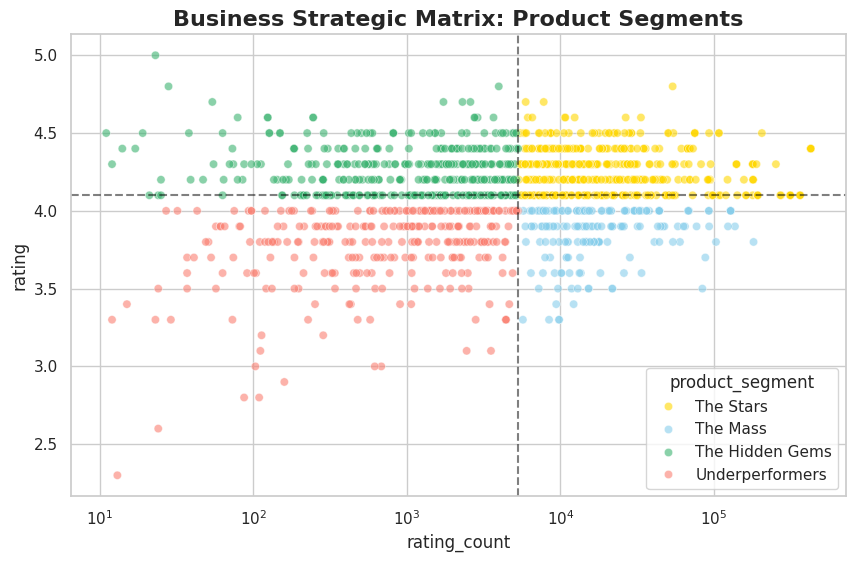

In [52]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_final,
    x='rating_count',
    y='rating',
    hue='product_segment',
    palette={'The Stars': 'gold', 'The Hidden Gems': 'mediumseagreen', 'The Mass': 'skyblue', 'Underperformers': 'salmon'},
    alpha=0.6
)

# quadrant dividers
plt.axhline(rating_thresholds, color='black', linestyle='--', alpha=0.5)
plt.axvline(count_thresholds, color='black', linestyle='--', alpha=0.5)

plt.xscale('log')
plt.title('Business Strategic Matrix: Product Segments', fontsize=16, fontweight='bold')
plt.show()

The Stars products are our market leaders. We should protect their position and maintain stock levels.

In [53]:
# Top 10 Rating of Stars
stars_list = df_final[df_final['product_segment'] == 'The Stars'].sort_values(by='rating', ascending=False)
stars_list[['product_name', 'main_category', 'rating', 'rating_count']].head(10)

,product_name,main_category,rating,rating_count
1145,Swiffer Instant Electric Water Heater Faucet T...,Home&Kitchen,4.8,53803.0
249,Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...,Electronics,4.7,5935.0
459,Spigen EZ Fit Tempered Glass Screen Protector ...,Electronics,4.7,7779.0
1381,"Sujata Dynamix DX Mixer Grinder, 900W, 3 Jars ...",Home&Kitchen,4.6,6550.0
853,Logitech Pebble M350 Wireless Mouse with Bluet...,Computers&Accessories,4.6,10652.0
886,"Logitech M331 Silent Plus Wireless Mouse, 2.4G...",Computers&Accessories,4.6,12375.0
447,Spigen EZ Fit Tempered Glass Screen Protector ...,Electronics,4.6,26603.0
820,Redgear MP35 Speed-Type Gaming Mousepad (Black...,Computers&Accessories,4.6,33434.0
964,Logitech G402 Hyperion Fury USB Wired Gaming M...,Computers&Accessories,4.6,10760.0
468,Spigen EZ Fit Tempered Glass Screen Protector ...,Electronics,4.6,6129.0


Our analysis shows many 'Hidden Gems' with very high ratings (4.5–5.0) but low popularity. If we promote these products together with our 'Star' products, we can increase sales for these high-quality items that customers haven't discovered yet.

In [54]:
# Top 10 Rating of Hidden Gems
hidden_gems_list = df_final[df_final['product_segment'] == 'The Hidden Gems'].sort_values(by='rating', ascending=False)
hidden_gems_list[['product_name', 'main_category', 'rating', 'rating_count']].head(10)

,product_name,main_category,rating,rating_count
775,Amazon Basics Wireless Mouse | 2.4 GHz Connect...,Computers&Accessories,5.0,23.0
1299,"Instant Pot Air Fryer, Vortex 2QT, Touch Contr...",Home&Kitchen,4.8,3964.0
1201,"Oratech Coffee Frother electric, milk frother ...",Home&Kitchen,4.8,28.0
1388,Campfire Spring Chef Prolix Instant Portable W...,Home&Kitchen,4.7,2591.0
1226,Zuvexa USB Rechargeable Electric Foam Maker - ...,Home&Kitchen,4.7,54.0
1223,"FIGMENT Handheld Milk Frother Rechargeable, 3-...",Home&Kitchen,4.7,1729.0
1275,Multifunctional 2 in 1 Electric Egg Boiling St...,Home&Kitchen,4.7,2300.0
137,"10k 8k 4k HDMI Cable, Certified 48Gbps 1ms Ult...",Electronics,4.6,3664.0
1216,"VRPRIME Lint Roller Lint Remover for Clothes, ...",Home&Kitchen,4.6,79.0
1119,Lint Remover Woolen Clothes Lint Extractor Bat...,Home&Kitchen,4.6,124.0


We need to monitor The Mass products closely for quality issues or high return rates to protect the brand reputation.

In [55]:
# Top 10 popularity of The Mass
mass_list = df_final[df_final['product_segment'] == 'The Mass'].sort_values(by='rating_count', ascending=False)
mass_list[['product_name', 'main_category', 'rating', 'rating_count']].head(10)

,product_name,main_category,rating,rating_count
591,boAt Airdopes 121v2 in-Ear True Wireless Earbu...,Electronics,3.8,180998.0
585,boAt Airdopes 141 Bluetooth Truly Wireless in ...,Electronics,3.9,136954.0
414,"Nokia 105 Single SIM, Keypad Mobile Phone with...",Electronics,4.0,128311.0
441,"Nokia 105 Plus Single SIM, Keypad Mobile Phone...",Electronics,4.0,128311.0
449,"Nokia 105 Plus Single SIM, Keypad Mobile Phone...",Electronics,4.0,128311.0
345,"Nokia 105 Single SIM, Keypad Mobile Phone with...",Electronics,4.0,128311.0
1022,Pigeon by Stovekraft Amaze Plus Electric Kettl...,Home&Kitchen,3.9,123365.0
656,Boult Audio Probass Curve Bluetooth Wireless i...,Electronics,3.8,103052.0
601,"JBL C50HI, Wired in Ear Headphones with Mic, O...",Electronics,3.9,92995.0
745,Noise ColorFit Pro 2 Full Touch Control Smart ...,Electronics,4.0,92588.0


The Underperformers should be considered clearing out the stock or investigating why they are failing (e.g., is the price too high or the quality too poor?)

In [56]:
# Top 10 Rating of Underperformers
under_list = df_final[df_final['product_segment'] == 'Underperformers'].sort_values(by='rating', ascending=True)
under_list[['product_name', 'main_category', 'rating', 'rating_count']].head(10)

,product_name,main_category,rating,rating_count
1243,"Personal Size Blender, Portable Blender, Batte...",Home&Kitchen,2.3,13.0
1356,Green Tales Heat Seal Mini Food Sealer-Impulse...,Home&Kitchen,2.6,24.0
545,SHREENOVA ID116 Plus Bluetooth Fitness Smart W...,Electronics,2.8,87.0
1286,MR. BRAND Portable USB Juicer Electric USB Jui...,Home&Kitchen,2.8,109.0
1449,IONIX Tap filter Multilayer | Activated Carbon...,Home&Kitchen,2.9,159.0
1315,"Nirdambhay Mini Bag Sealer, 2 in 1 Heat Sealer...",Home&Kitchen,3.0,617.0
263,7SEVEN Compatible LG TV Remote Suitable for LG...,Electronics,3.0,103.0
550,Tokdis MX-1 Pro Bluetooth Calling Smartwatch -...,Electronics,3.0,681.0
1251,akiara - Makes life easy Electric Handy Sewing...,Home&Kitchen,3.1,2449.0
1089,Amazon Basics 2000/1000 Watt Room Heater with ...,Home&Kitchen,3.1,111.0


The "Underperformers" group is too broad. It includes both slightly below average products and truly bad products.

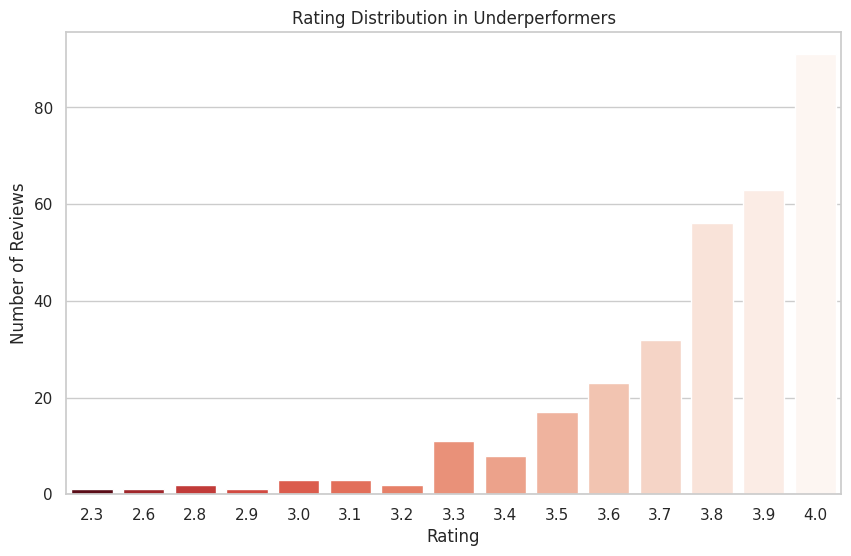

In [57]:
# filter only underperformers
under_df = df_final[df_final['product_segment'] == 'Underperformers']

plt.figure(figsize=(10, 6))
sns.countplot(data=under_df, x='rating', hue='rating', palette='Reds_r', legend=False)

plt.title('Rating Distribution in Underperformers')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()

Looking at the distribution, most customers in the Underperformer group actually give a 4.0 rating. This means the products are not terrible.

However, we see a small group of 'Critical Failures' below 3.7 stars. These are the customers who are truly unhappy. To find the most serious problems, we should focus our Root Cause Analysis (RCA) on this bottom group.

So we split Underperformers into two sub-segments to focus on the most critical issues.

In [58]:
critical_df = df_final[(df_final['product_segment'] == 'Underperformers') & (df_final['rating'] < 3.7)]

print(f"Number of Products in Critical Failures Group: {len(critical_df)}")

Number of Products in Critical Failures Group: 72


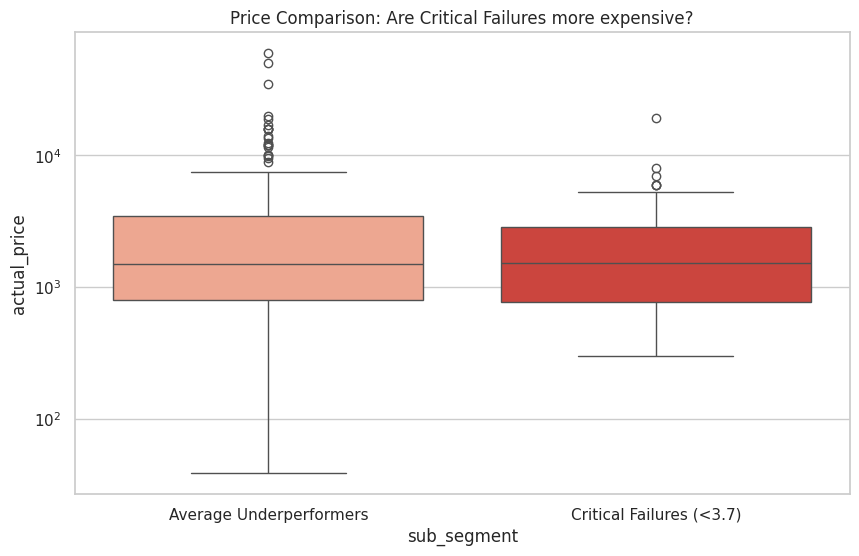

In [59]:
def sub_segment(row):
    if row['product_segment'] == 'Underperformers':
        return 'Critical Failures (<3.7)' if row['rating'] < 3.7 else 'Average Underperformers'
    return row['product_segment']

df_final['sub_segment'] = df_final.apply(sub_segment, axis=1)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_final[df_final['product_segment'] == 'Underperformers'],
            x='sub_segment',
            y='actual_price',
            hue='sub_segment',
            palette='Reds',
            legend=False)
plt.yscale('log')
plt.title('Price Comparison: Are Critical Failures more expensive?')
plt.show()

The median prices are very similar. Price is not the reason why 'Critical Failures' are failing. This means these products are not too expensive. Even at a lower price, they still underperform.

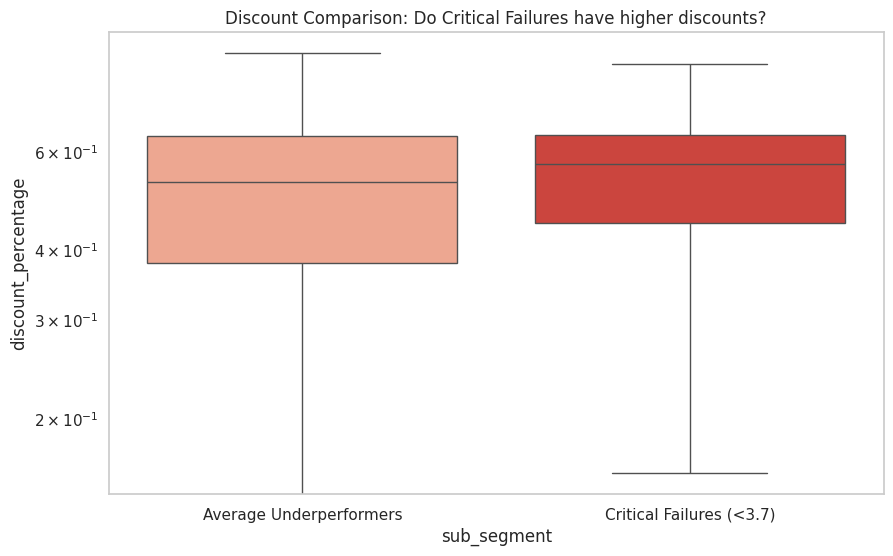

In [60]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_final[df_final['product_segment'] == 'Underperformers'],
            x='sub_segment',
            y='discount_percentage',
            hue='sub_segment',
            palette='Reds',
            legend=False)
plt.yscale('log')
plt.title('Discount Comparison: Do Critical Failures have higher discounts?')
plt.show()

'Critical Failure' products have very high discounts. This suggests a 'Clearance Strategy.' The seller is likely trying to sell off defective or low-quality items quickly by dropping the price.

But this strategy is risky. Even with a 50-70% discount, customers are still unhappy because the quality is too poor. It is better to stop selling these items than to ruin the brand's reputation with cheap, broken products.

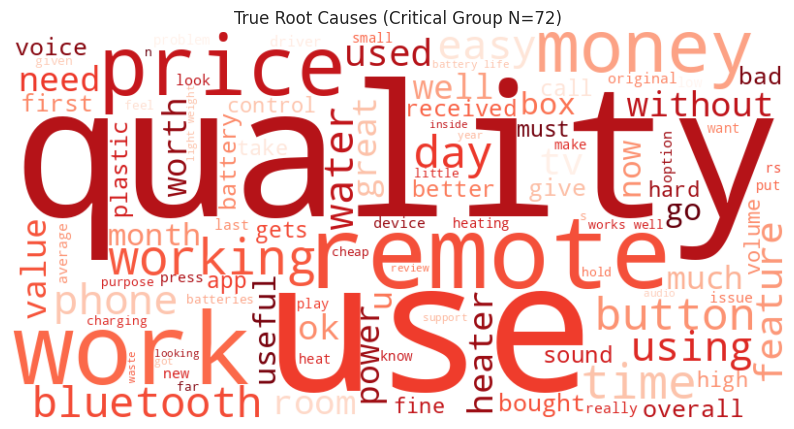

In [71]:
from wordcloud import WordCloud, STOPWORDS

my_stopwords = set(STOPWORDS)
my_stopwords.update(['product', 'good', 'nice', 'best', 'amazon', 'item', 'buy', 'will', 'even', 'one'])

text = " ".join(critical_df['review_content'].dropna().astype(str).str.lower())

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=my_stopwords,
    collocations=True,
    colormap='Reds',
    max_words=100
).generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('True Root Causes (Critical Group N=72)')
plt.show()

I use this Word Cloud to see the 'Big Picture' of customer complaints. It shows that words like 'quality', 'use', and 'work' appear very often. This gives us a quick idea of what is wrong with these 71 products.

To be 100% sure, I did a 'Deep Dive' into the Top 10 most complained products. I read their reviews to see if the quality is really the problem.

In [72]:
# Top 10 Rating Content of Critical Failures Group
under_list = df_final[df_final['product_segment'] == 'Underperformers'].sort_values(by='rating', ascending=True)
under_list[['product_name', 'main_category', 'rating', 'rating_count', 'review_title', 'review_content']].head(10)

,product_name,main_category,rating,rating_count,review_title,review_content
1243,"Personal Size Blender, Portable Blender, Batte...",Home&Kitchen,2.3,13.0,"Nice product i recommend to buy,Do not buy!! D...","I liked that it is so convenient to carry,Wast..."
1356,Green Tales Heat Seal Mini Food Sealer-Impulse...,Home&Kitchen,2.6,24.0,"It is broken,Could have been a bit better,The ...",It is broken and it is not useful. Please chan...
545,SHREENOVA ID116 Plus Bluetooth Fitness Smart W...,Electronics,2.8,87.0,"Very Good prodat,Battery life is 0 day,Good,Wh...","Good Prodat,Battery life is so bad.,Nice produ..."
1286,MR. BRAND Portable USB Juicer Electric USB Jui...,Home&Kitchen,2.8,109.0,"Portable but not much powerful,not so good. po...","Not sufficient power,the product is more like ..."
1449,IONIX Tap filter Multilayer | Activated Carbon...,Home&Kitchen,2.9,159.0,"Stop working after few days,Ok. Changing every...","Stop working after few days,Ok,It doesn't fit ..."
1315,"Nirdambhay Mini Bag Sealer, 2 in 1 Heat Sealer...",Home&Kitchen,3.0,617.0,"Not worth the hype,Gud,Really useful 😃,Product...",Hi viewers so I bought this product after watc...
263,7SEVEN Compatible LG TV Remote Suitable for LG...,Electronics,3.0,103.0,"Not good,No voice recognition, No pointer ray ...",The mouse feature of the remote is not working...
550,Tokdis MX-1 Pro Bluetooth Calling Smartwatch -...,Electronics,3.0,681.0,"Its is good but battery life is very poor,Hear...","Its is value for money,,Good product,Good, lik..."
1251,akiara - Makes life easy Electric Handy Sewing...,Home&Kitchen,3.1,2449.0,"Easy to keep and use,Good for quick fixes,Aver...",It's good product you can face challenge in st...
1089,Amazon Basics 2000/1000 Watt Room Heater with ...,Home&Kitchen,3.1,111.0,"It's good 👍,Good...,Good Product,Satisfied,Goo...","It's working,Good,Good Product 👍,Nice product,..."


Customers are reporting major issues
1. Products break after only 5 days.
2. Features don't match the description.
3. Fake 5-Star Ratings (sellers offered cashback for good reviews)

To fix the Critical group, we must stop selling dangerous or broken items immediately. We should find better suppliers to improve material quality and change product descriptions to be more honest. Finally, we must stop using 'fake review' tactics and focus on faster customer support to rebuild brand trust.